In [1]:
!pip install tensorflow-gpu


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached tensorflow_gpu-2.9.1-cp39-cp39-win_amd64.whl (444.0 MB)


In [2]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [3]:
# importing some basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('Churn_Modelling.csv')

In [5]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
# Divide the dataset into independent and dependent features
X = data.iloc[:,3:13]
y = data.iloc[:,13]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

Data set is not clean, we have few categorical features applicable coluns, we need to fix these columns.

In [9]:
# Feature Engineering

geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [11]:
# Concatenate these to the dataset after dropping the concatenating columns
X = X.drop(['Geography', 'Gender'], axis = 1)

In [12]:
X 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [13]:
X = pd.concat([X,geography, gender],axis=1)

In [14]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [15]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [18]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [19]:
X_train.shape, X_test.shape

((8000, 11), (2000, 11))

In [20]:
# Now lets create a ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [44]:
# Lets initialize the ANN
classifier = Sequential()

In [45]:
# Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [46]:
# Adding the 1st hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.25)) # dropout to avoid overfitting

In [47]:
# Adding 2nd hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [48]:
# Adding output layer
classifier.add(Dense(1,activation='sigmoid'))

In [49]:
# giving learning rate to adam optimizer, default learning rate is 0.01
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [50]:
# compile neural network
classifier.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

In [51]:
# early stopping - when ever model accuracy is not increasing we would stop the epochs
early_stopping = tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                min_delta = 0.0001,
                patience = 20,
                verbose = 1,
                mode = 'auto',
                baseline = None,
                restore_best_weights = False,)

In [52]:
model_history = classifier.fit(X_train, y_train,validation_split=0.33,batch_size=10,epochs=100, callbacks=early_stopping)

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.4741 - accuracy: 0.7981 - val_loss: 0.4308 - val_accuracy: 0.8190
Epoch 2/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4309 - accuracy: 0.8128 - val_loss: 0.4043 - val_accuracy: 0.8277
Epoch 3/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4116 - accuracy: 0.8201 - val_loss: 0.3997 - val_accuracy: 0.8319
Epoch 4/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4041 - accuracy: 0.8281 - val_loss: 0.3843 - val_accuracy: 0.8402
Epoch 5/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3939 - accuracy: 0.8328 - val_loss: 0.3810 - val_accuracy: 0.8410
Epoch 6/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3879 - accuracy: 0.8356 - val_loss: 0.3691 - val_accuracy: 0.8482
Epoch 7/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3900 - accuracy: 0.8324 - val_loss: 0.3768 - val_accuracy: 0.8448

In [53]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

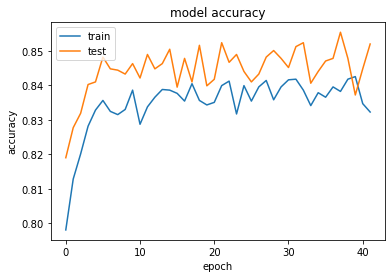

In [54]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

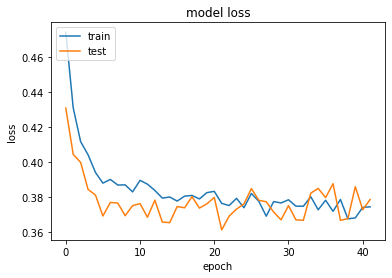

In [55]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1551,   44],
       [ 222,  183]], dtype=int64)

In [58]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.867

In [59]:
# Get the weights
classifier.get_weights()

[array([[ 0.0808954 , -0.09935762,  0.17004986, -0.6322146 , -0.30099276,
         -0.09064841,  0.06348497, -0.16076855, -0.55088747,  0.8117259 ,
          0.8405594 ],
        [-2.2801123 ,  0.74239105, -0.89096594,  0.4397624 , -2.7261114 ,
          2.5235336 ,  1.2445273 ,  0.763786  ,  1.389481  , -1.46826   ,
         -0.67980236],
        [ 0.14782478,  0.98683214,  0.514097  , -0.01871169,  0.3647993 ,
          0.35229653,  0.31795165,  0.26326075,  0.5184734 ,  0.968448  ,
          0.04887186],
        [-0.9110183 , -0.23524648, -2.5980732 , -1.6011046 , -0.21770865,
         -1.0994219 ,  0.3773474 , -0.10360471, -3.1657586 , -1.9052533 ,
         -1.1442062 ],
        [-1.0955642 , -0.9552611 ,  0.3200689 , -1.4047202 , -0.63878465,
         -0.88718534,  3.9919035 , -4.538082  , -3.7151248 , -1.1289223 ,
         -0.42315   ],
        [-0.7047969 ,  0.2693669 , -0.65354115,  0.3327447 ,  0.5739382 ,
         -0.1069235 ,  0.09564386,  0.01921053, -0.18504032, -1.1022751